In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('test1_modify5.csv')

In [3]:
df.head()   # 데이터 프레임 확인

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0


### 날씨가 사람의 건강에 미치는 영향 
- 여름에는 열사병, 겨울에는 동상 위험
- heat index 온도/습도 , wind chill 겨울 체감 온도

In [4]:
# 이미지에 계산공식 적혀있음
T = 42  # temp
R = 40  # humid

# result : 54
def heat_index(T, R):
    c1 = -8.78469475556
    c2 = 1.61139411
    c3 = 2.33854883889
    c4 = -0.14611605
    c5 = -0.012308094
    c6 = -0.0164248277778
    c7 = 0.002211732
    c8 = 0.00072546
    c9 = -0.000003582

    TR = T * R
    T2 = T * T
    R2 = R * R
    T2R = T2 * R
    TR2 = T * R2
    T2R2 = T2 * R2

    part_1 = c1 + (c2 * T) + (c3 * R) + (c4 * TR) + (c5 * T2)
    part_2 = (c6 * R2) + (c7 * T2R) + (c8 * TR2) + (c9 * T2R2)
    HI = part_1 + part_2
    return  HI

In [5]:
df['heat_index'] = heat_index(df['temp'], df['humid'])
df.head()

# 온도는 열지수가 잘못 구해짐( 높게 나오기 때문에)
# heat index는 temp가 27도 이상일 때 20으로 reset

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,117.448563
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,128.166814
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,149.846951
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,150.686724
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,158.472589


In [7]:
df.loc[df['temp'] < 27, 'heat_index'] = 20
df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,20.0
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,20.0
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,20.0
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,20.0
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,20.0


In [9]:
#이미지보고 조건식
df['heat_stroke'] = 0      #열사병관련
df.loc[df['heat_index'] >= 27, 'heat_stroke'] = 1
df.loc[df['heat_index'] >= 33, 'heat_stroke'] = 2
df.loc[df['heat_index'] >= 41, 'heat_stroke'] = 3
df.loc[df['heat_index'] >= 54, 'heat_stroke'] = 4

df.head()


,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index,heat_stroke
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,20.0,0
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,20.0,0
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,20.0,0
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,20.0,0
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,20.0,0


In [12]:
# 겨울 체감온도 
Tair = -35
V = 10 

def wind_chill(Tair, V):
    WC = 13.12 + (0.6215 * Tair) - (11.37 * V ** 0.16) + ((0.3965 * Tair) * V ** 0.16)
    return WC

wind_chill(Tair, V)

-45.126240611907804

In [14]:
# 체감온도 관련 컬럼 추가
df['wind_chill_index'] = wind_chill(df['temp'], df['windspeed'])
df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index,heat_stroke,wind_chill_index
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,20.0,0,-11.221943
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,20.0,0,-11.121686
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,20.0,0,-13.354612
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,20.0,0,-11.293103
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,20.0,0,-15.820495


In [15]:
# 범위를 4구간으로
df['wind_chill'] = 0          
df.loc[df['wind_chill_index'] < -9, 'wind_chill'] = 1
df.loc[df['wind_chill_index'] < -27, 'wind_chill'] = 2
df.loc[df['wind_chill_index'] < -37, 'wind_chill'] = 3
df.loc[df['wind_chill_index'] < -54, 'wind_chill'] = 4

df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index,heat_stroke,wind_chill_index,wind_chill
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,20.0,0,-11.221943,1
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,20.0,0,-11.121686,1
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,20.0,0,-13.354612,1
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,20.0,0,-11.293103,1
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,20.0,0,-15.820495,1


In [16]:
df.columns

Index(['datetime', 'regular', 'casual', 'group', 'temp', 'dew', 'humid',
       'windspeed', 'windforce', 'humidex', 'discomfort', 'heat_index',
       'heat_stroke', 'wind_chill_index', 'wind_chill'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36871 entries, 0 to 36870
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          36871 non-null  object 
 1   regular           36871 non-null  int64  
 2   casual            36871 non-null  float64
 3   group             36871 non-null  float64
 4   temp              36871 non-null  int64  
 5   dew               36871 non-null  int64  
 6   humid             36871 non-null  int64  
 7   windspeed         36871 non-null  int64  
 8   windforce         36871 non-null  int64  
 9   humidex           36871 non-null  float64
 10  discomfort        36871 non-null  int64  
 11  heat_index        36871 non-null  float64
 12  heat_stroke       36871 non-null  int64  
 13  wind_chill_index  36871 non-null  float64
 14  wind_chill        36871 non-null  int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 4.2+ MB


In [18]:
df['datetime']

0        2021-01-01 00:00:00
1        2021-01-01 01:00:00
2        2021-01-01 02:00:00
3        2021-01-01 03:00:00
4        2021-01-01 04:00:00
                ...         
36866    2024-12-31 19:00:00
36867    2024-12-31 20:00:00
36868    2024-12-31 21:00:00
36869    2024-12-31 22:00:00
36870    2024-12-31 23:00:00
Name: datetime, Length: 36871, dtype: object

In [22]:
# 파싱 : 칼럼에 있는 텍스트 형태의 날짜와 시간 정보를 컴퓨터가 이해할 수 있는 datetime 객체로 변환하는 과정
# 칼럼의 값을 변경하지 않고 칼럼값 x를 설정하여  datetime 객체로 변환한 결과를 새로운 칼럼에 할당하여 칼럼추가!

parsed = df['datetime'].apply(lambda x: pd.to_datetime(x))  
df['year'] = parsed.apply(lambda x: x.year)
df['month'] = parsed.apply(lambda x: x.month)
df['hour'] = parsed.apply(lambda x: x.hour)
df['dayofweek'] = parsed.apply(lambda x: x.dayofweek)

df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index,heat_stroke,wind_chill_index,wind_chill,year,month,hour,dayofweek
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,20.0,0,-11.221943,1,2021,1,0,4
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,20.0,0,-11.121686,1,2021,1,1,4
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,20.0,0,-13.354612,1,2021,1,2,4
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,20.0,0,-11.293103,1,2021,1,3,4
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,20.0,0,-15.820495,1,2021,1,4,4


In [20]:
df.columns

Index(['datetime', 'regular', 'casual', 'group', 'temp', 'dew', 'humid',
       'windspeed', 'windforce', 'humidex', 'discomfort', 'heat_index',
       'heat_stroke', 'wind_chill_index', 'wind_chill', 'year', 'month',
       'hour', 'dayofweek'],
      dtype='object')

In [21]:
df.to_csv('test1_modify6.csv', index= False)

### 스마트한 도구
- bayesian-optimization
- pandas_profiling       # 사용 권장
- xgboost
- shap
- lazypredict
- optuna
- pip install ydata-profiling --upgrade   #  추가

In [25]:
# import ydata_profiling as pp
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)


In [26]:
# pp.__version__     버전 확인

In [27]:
# df = pd.read_csv('test1_modify6.csv')
# report = pp.ProfileReport(df)
# df.columns

In [28]:
#interested = ['year', 'month', 'hour', 'dayofweek', 'windforce','wind_chill', 'discomfort', 'heat_stroke', 'regular', 'casual', 'group']
#df[interested].to_csv("test1_modify7.csv", index=False)

- 파싱까지 마친 파일들 중 필요한 칼럼들만 추출하여 다른 이름으로 저장 / index=False 필수
- 같은 창에서 코드 실행 시 안될 수 있으니 창을 하나 더 연 다음 실행 

> EDA
> 탐색적 데이터 분석 의미, 머신 러닝 프로젝트나 데이터 분석 작업에서 데이터를 더 잘 이해하기 위한 중요한 과정. EDA는 데이터를 시각화하고 통계적인 방법으로 데이터를 요약하는 일련의 기법을 포함하며, 분석자는 이를 통해 데이터의 특성을 파악하고, 데이터 품직을 점검하며 숨겨진 패턴 - 상관관계 - 이상치를 발견할 수 있음.  EDA는 데이터 전처리와 모델 구축을 위한 중요한 단계로 머신러닝 프로젝트의 성공적인 수행에 필수적임

### EDA 목적
1. 데이터 구조와 특성 파악
    - 데이터를 분석하는 첫번째 단계로, 데이터가 어떤 형태인지 어떤 변수가 포함되어 있는지 각 변수의 분포가 어떻게 되어 있는지 파악

2. 데이터의 요약
    - 평균, 중앙값, 분산, 표준편차 등 기본적인 통계 지표를 사용해 데이터의 분포와 특성을 요약
      
3. 이상치 탐지
    - 모델 성능에 큰 영향을 줄 수 있는 이상치를 찾아내어 분석하고 처리

4. 결측치 확인
   - 결측값 파악 후 데이터를 처리하는 방법 선택
     
5. 변수 간 관계 파악
   - 상관관계, 변수 간 상호작용 등 분석하여 데이터 패턴 이해 후 모델링에서 중요한 변수 식별.

  
### EDA의 주요 기법

1. 기술통계(Descriptive Statistics):

    - 데이터의 기본적인 통계 요약을 통해 데이터를 정리
        - Mean: 데이터의 중앙 경향을 나타냅니다.
        - Median: 데이터의 중앙값으로, 이상치에 덜 민감한 통계량입니다.
        - Variance 및 Standard Deviation: 데이터의 변동성(흩어진 정도)을 나타냅니다.
        - 최대값, 최소값, 사분위수: 데이터 분포의 범위를 파악할 수 있는 값

2. 데이터 시각화(Data Visualization):

    - 시각화를 통해 데이터의 분포와 특성을 직관적으로 파악할 수 있습니다.
        - Histogram: 데이터의 분포를 시각화하여 변수가 어떻게 분포하는지 확인합니다.
        - Box Plot: 이상치와 사분위수를 확인할 수 있는 그래프입니다.
        - Scatter Plot: 두 변수 간의 상관관계를 시각화합니다.
        - Heatmap: 다중 변수 간의 상관관계를 시각적으로 표현합니다.

3. 상관분석(Correlation Analysis):

    - 변수 간의 관계를 측정하는 지표로 **상관계수(correlation coefficient)**를 사용합니다. 상관계수는 -1에서 1 사이의 값을 가지며, 1에 가까울수록 두 변수가 강한 양의 상관관계를, -1에 가까울수록 강한 음의 상관관계를 가집니다. 0에 가까울수록 두 변수는 독립적입니다.

4. 이상치 탐지(Outlier Detection):

    - 이상치는 데이터 분포에서 벗어나는 값으로, 데이터 분석과 모델 성능에 영향을 미칩니다.
        - 박스 플롯을 사용해 이상치를 쉽게 시각화할 수 있습니다.
        - Z-score, IQR(Interquartile Range) 등의 기법으로 이상치를 수치적으로 정의할 수 있습니다.

5. 결측치 분석(Missing Value Analysis):

    - 결측값이 있는 변수를 확인하고, 결측값이 전체 데이터에 미치는 영향을 분석합니다. 결측값 처리 방법에는 다음이 있습니다:
        - 제거(Drop): 결측값이 포함된 행이나 열을 제거.
        - 대체(Imputation): 결측값을 평균, 중앙값, 또는 예측된 값으로 채웁니다.
        - 모델 기반 대체: 결측치를 예측 모델을 사용하여 대체하는 방법입니다.
     
### EDA 과정

1. 데이터 불러오기 및 요약:

    - 데이터의 크기(행과 열의 수)를 확인하고, 변수들의 유형(수치형, 범주형)을 확인합니다.

2. 기술통계 분석:

    - 각 변수에 대한 요약 통계를 계산합니다(평균, 표준편차, 최소/최대값, 사분위수).

3. 시각화:

    - 히스토그램, 박스 플롯, 산점도 등을 통해 각 변수의 분포와 변수 간 관계를 시각적으로 분석합니다.

4. 상관관계 분석:
    - 변수들 간의 상관관계를 계산하고, 상관관계가 높은 변수들 간의 관계를 깊이 분석.
    - 이를 통해 다중 공선성(multicollinearity) 문제를 파악할 수 있습니다.

5. 이상치 및 결측치 분석:

    - 이상치와 결측치를 확인하고, 이를 처리할 전략을 결정합니다.

6. 데이터 전처리(Preprocessing):

    - 분석된 결과에 따라 데이터를 변환, 삭제 또는 추가하여 모델링에 적합한 형태로 만듭니다.

### EDA에서 사용하는 주요 라이브러리

- Pandas
- Matplotlib
- Seaborn
- Scipy/Statsmodels

### 결측치 / 이상치

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('your_data.csv')

In [2]:
# 불러온 데이터 정보 확인

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  10 non-null     int64
 1   feature2  10 non-null     int64
 2   feature3  10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes
None
        feature1   feature2   feature3
count  10.000000   10.00000  10.000000
mean   16.500000  107.90000   3.900000
std     5.582711   34.11891   1.911951
min    10.000000   80.00000   1.000000
25%    13.250000   91.25000   2.250000
50%    15.500000   99.50000   4.000000
75%    17.750000  108.75000   5.000000
max    30.000000  200.00000   7.000000


In [4]:
# 결측치 확인 / null값 수 +

print(df.isnull().sum())   

feature1    0
feature2    0
feature3    0
dtype: int64


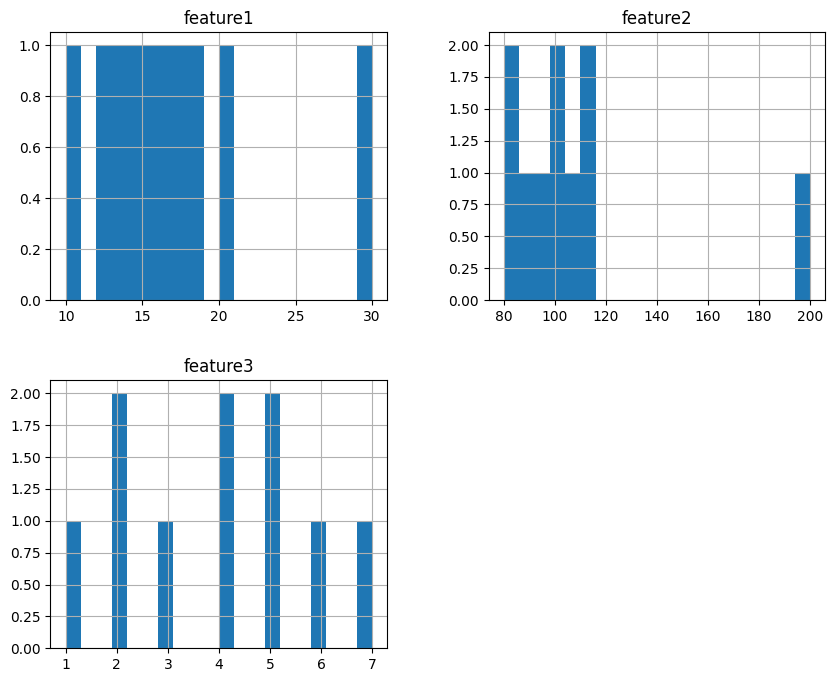

In [5]:
# 수치형 변수 히스토그램
df.hist(bins = 20, figsize =(10,8))
#데이터를 20개의 구간으로 나누어 각 구간에 속하는 빈도를 막대의 높이로 표현. 높을 수록 범위에 속하는 데이터가 다수
plt.show()

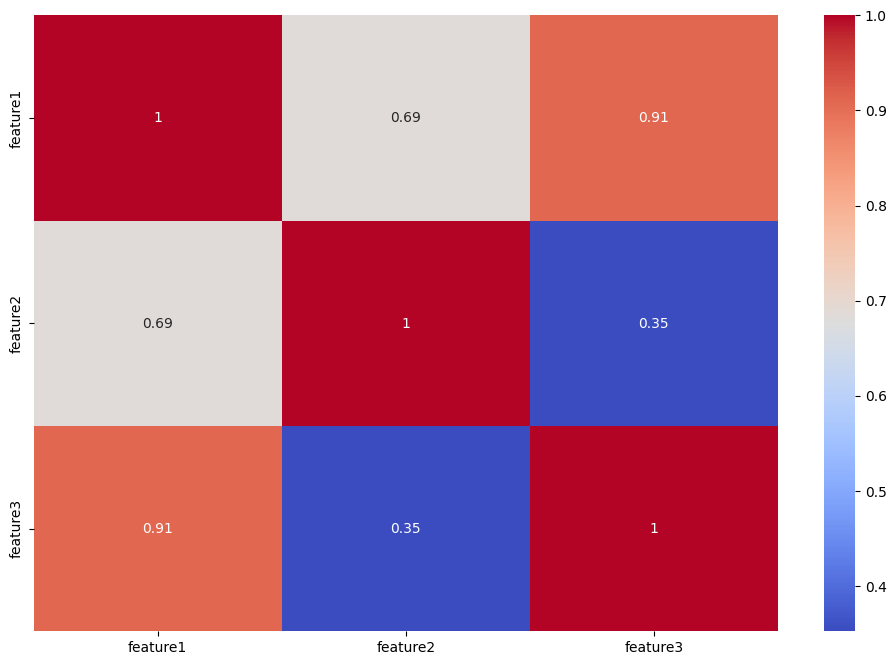

In [6]:
# 상관관게 히트맵

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

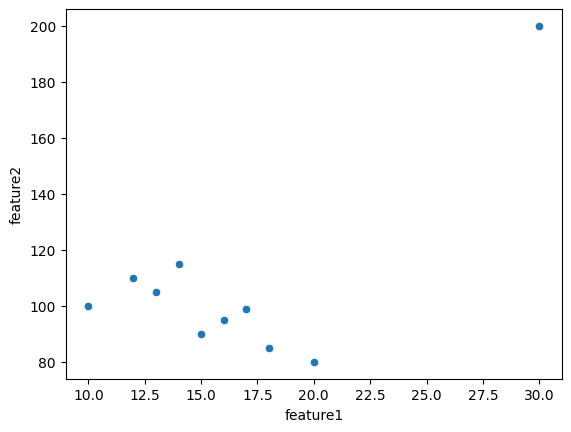

In [7]:
# 상관관계 높은 두 변수 산점도 그리기

sns.scatterplot(x='feature1', y='feature2', data=df)
plt.show()

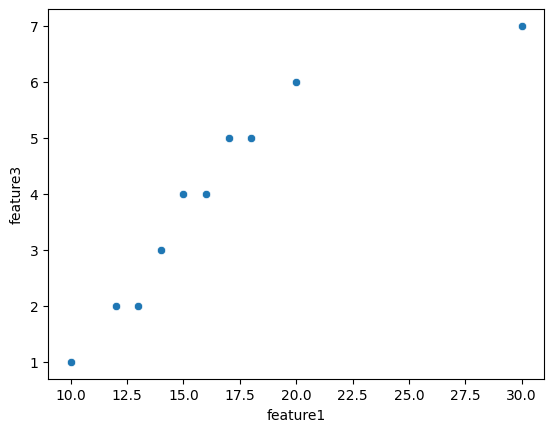

In [8]:
sns.scatterplot(x='feature1', y='feature3', data=df)
plt.show()

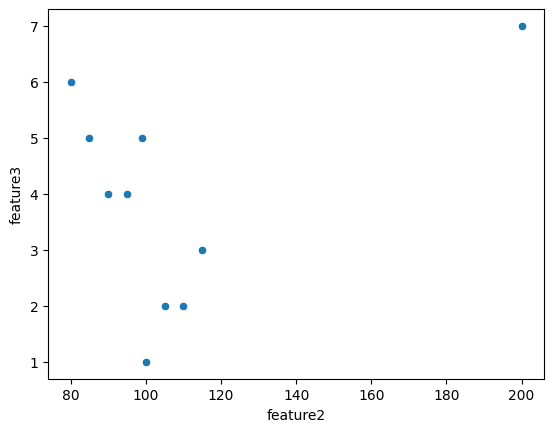

In [10]:
sns.scatterplot(x='feature2', y='feature3', data=df)
plt.show()

# 세 그래프 중 가장 좁게 퍼져있음 => 상관관계가 비교적 높다.

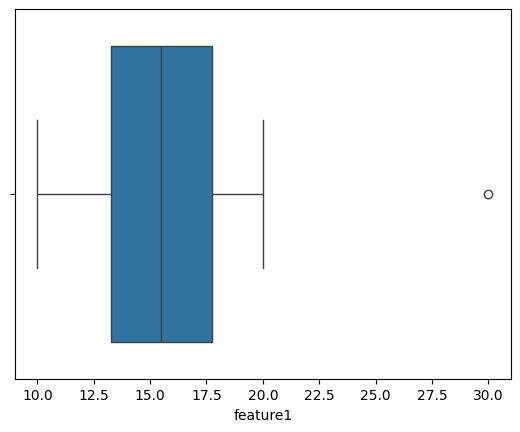

In [11]:
# 박스 플롯으로 이상치 탐지
sns.boxplot(x=df['feature1'])
plt.show()

In [12]:
import pandas as pd

df = pd.read_csv('test1_modify7.csv')

df.head()

,year,month,hour,dayofweek,windforce,wind_chill,discomfort,heat_stroke,regular,casual,group
0,2021,1,0,4,0,1,0,0,298,74.0,1.0
1,2021,1,1,4,0,1,0,0,249,66.0,1.0
2,2021,1,2,4,0,1,0,0,193,53.0,0.0
3,2021,1,3,4,0,1,0,0,153,33.0,2.0
4,2021,1,4,4,0,1,0,0,114,26.0,0.0


### 데이터 시각화 / 방향성에 맞는 그래프 생성

<Axes: xlabel='regular', ylabel='casual'>

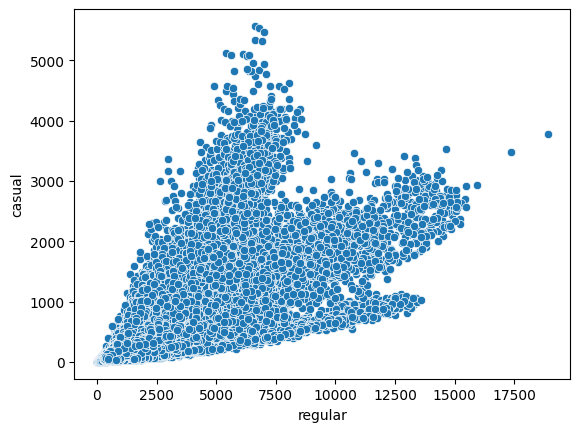

In [13]:
import seaborn as sns

sns.scatterplot(data = df, x = 'regular', y = 'casual')

In [14]:
set(df['month'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

<Axes: xlabel='regular', ylabel='casual'>

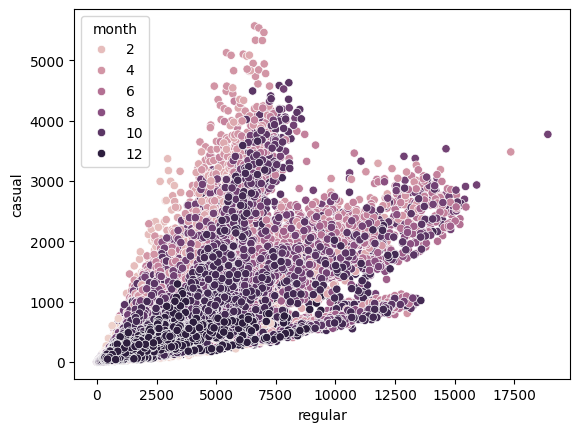

In [16]:
sns.scatterplot(data = df, x = 'regular', y = 'casual', hue = 'month')  # 달별로 산점도 그래프

<Axes: xlabel='regular', ylabel='casual'>

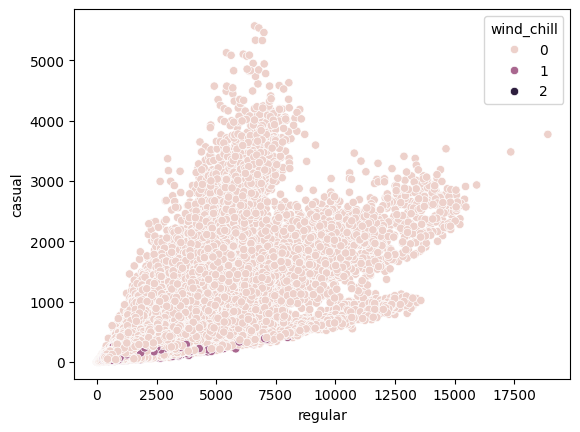

In [17]:
sns.scatterplot(data=df, x = 'regular' , y = 'casual' , hue = 'wind_chill')

#등록/비등록 회원의 평일과 휴일을 구분한 사용빈도 차이

<Axes: xlabel='year', ylabel='regular'>

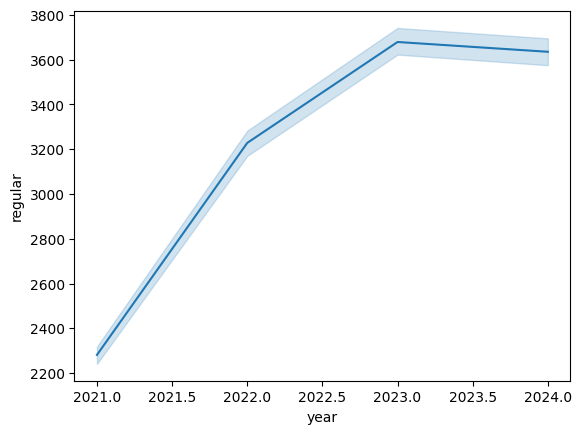

In [18]:
# lineplot  년도별 정기 회원 

sns.lineplot(data=df, x='year', y='regular')

<Axes: xlabel='month', ylabel='regular'>

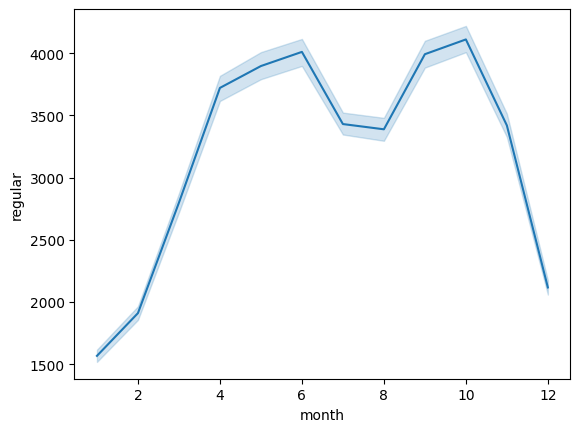

In [21]:
# 월별 정기 회원 /사용할 데이어프레임 정의 후 실행

sns.lineplot(data = df, x = 'month', y = 'regular')

<Axes: xlabel='year', ylabel='regular'>

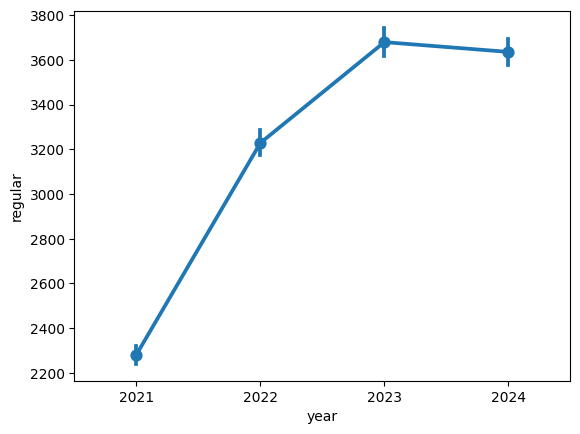

In [25]:
# 년도별 회원 수

sns.pointplot(data=df, x = 'year', y = 'regular')

<Axes: xlabel='month', ylabel='regular'>

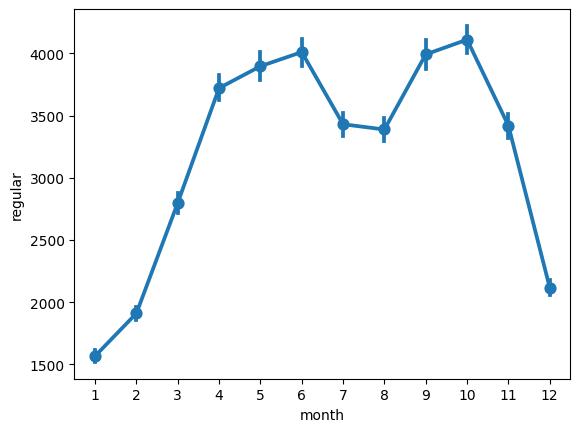

In [29]:
sns.pointplot(data = df, x = 'month', y = 'regular')

In [30]:
import matplotlib.pyplot as plt

<Axes: xlabel='hour', ylabel='casual'>

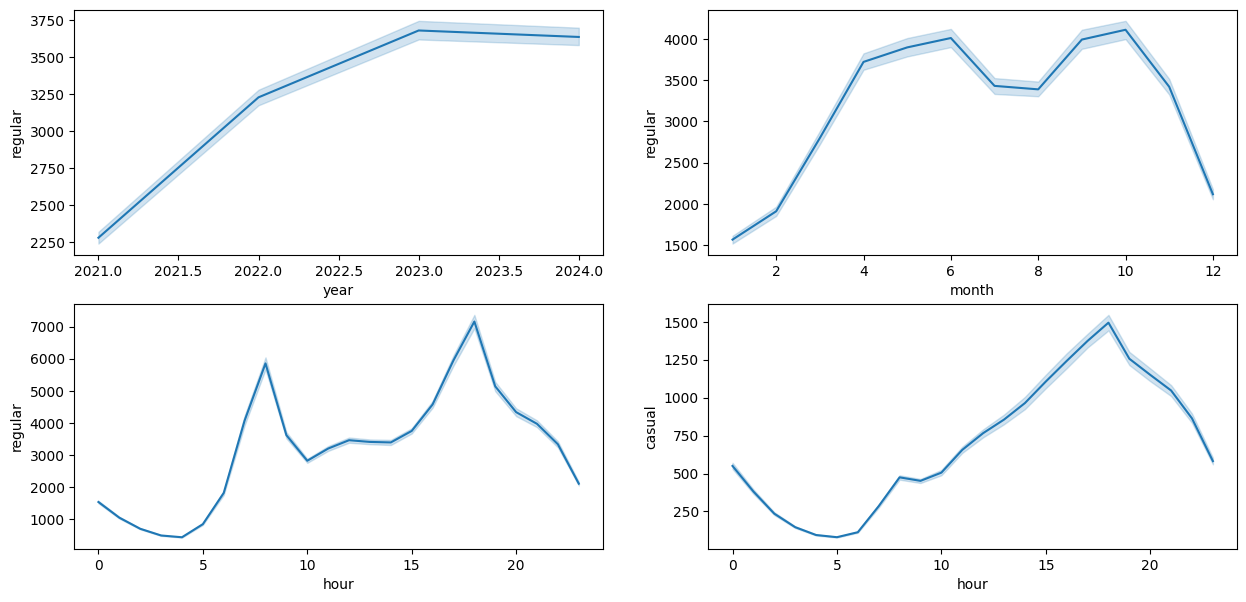

In [32]:
#적절한 그래프 선택하기

fig, ( (ax1, ax2), (ax3, ax4) ) = plt.subplots(ncols=2 , nrows=2)
fig.set_size_inches(15,7)


sns.lineplot( data=df, x='year', y='regular', ax=ax1 )
sns.lineplot( data=df, x='month', y='regular', ax=ax2 )
sns.lineplot( data=df, x='hour', y='regular', ax=ax3 )
sns.lineplot( data=df, x='hour', y='casual', ax=ax4 )


<Axes: xlabel='hour', ylabel='casual'>

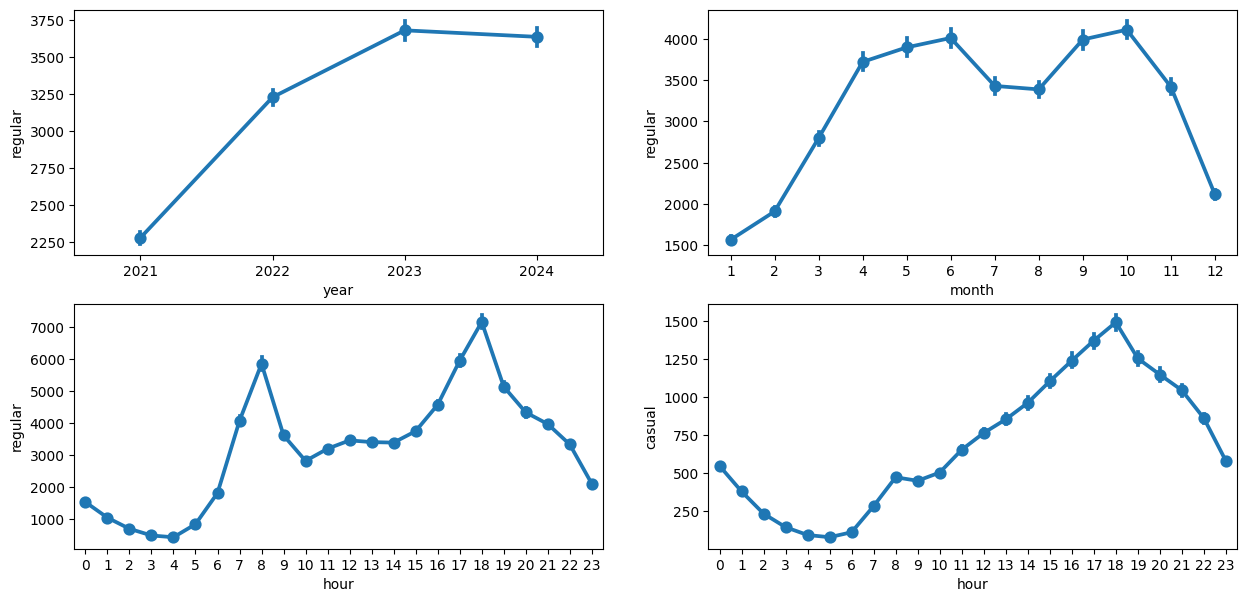

In [33]:
fig, ( (ax1, ax2), (ax3, ax4) ) = plt.subplots(ncols=2 , nrows=2)
fig.set_size_inches(15,7)


sns.pointplot( data=df, x='year', y='regular', ax=ax1 )
sns.pointplot( data=df, x='month', y='regular', ax=ax2 )
sns.pointplot( data=df, x='hour', y='regular', ax=ax3 )
sns.pointplot( data=df, x='hour', y='casual', ax=ax4 )

In [34]:
# weekend 칼럼 기본값 0으로 추가. dayofweek가 4초과(주말)면 1을 넣어라
df['weekend'] = 0
df.loc[df['dayofweek'] > 4, 'weekend'] = 1

<Axes: xlabel='regular', ylabel='casual'>

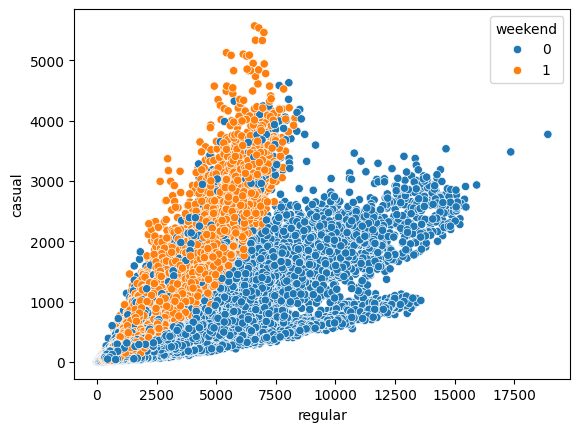

In [39]:
sns.scatterplot(data=df, x = 'regular' , y='casual', hue='weekend')

# 평일과 휴일의 비등록/등록 회원이 사용하는 빈도차
# dayofweek이던 평일과 휴일이 weekend 칼럼을 추가함으로써 이진

<Axes: xlabel='hour', ylabel='casual'>

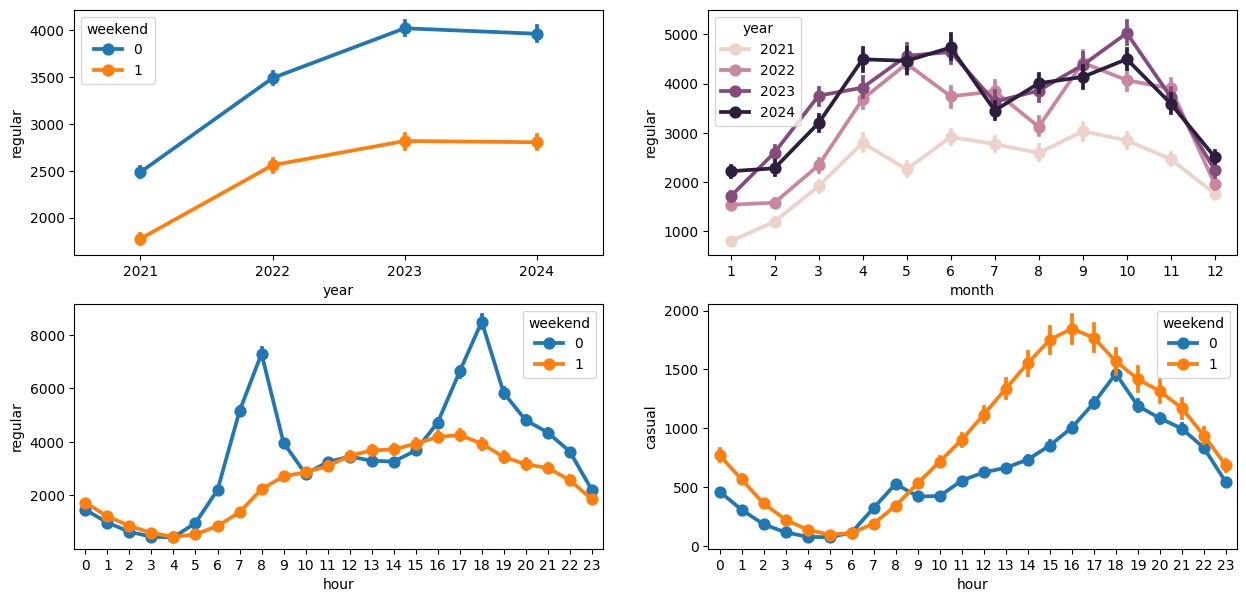

In [41]:
fig,( (ax1, ax2), (ax3, ax4) ) = plt.subplots(ncols=2 , nrows=2)
fig.set_size_inches(15,7)

#평일, 주말로 나누어 그래프화

sns.pointplot( data=df, x='year', y='regular', ax=ax1, hue='weekend')
sns.pointplot( data=df, x='month', y='regular', ax=ax2, hue='year' )
sns.pointplot( data=df, x='hour', y='regular', ax=ax3, hue='weekend' )
sns.pointplot( data=df, x='hour', y='casual', ax=ax4, hue='weekend' )

### 데이터 준비
- 이상치 탐지 / MAD방식 or IQR
- scaling - robust - min,max,std
- feature selection - PIMP ( 3가지의 중요한 방식 : Filter / Wrapper / Embedded )

#### MAD : 
#### 중간값으로부터 어느정도 떨어져있는지 확인하는 통계학 및 머신러닝에서 데이터의 변동성을 측정하는데 사용되는 지표 중 하나. 특히 데이터가 이상치에 민감한 평균과 표준편차 대신 강건한 통계량을 사용할 때 유용함.

> 중앙값 절대 편차
  각 값의 절대값의 중앙값에서 median의 중앙값을 빼서 계산. 평균 절대 편차와 비슷하지만 평균 대신 중앙값을 쓴다는 점이 다르고 절대편차의 일종임.

$MAD = median (| x_i - median(x) |) $

여기서 $(x_i)$

- $(\tilde{x})$는 그룹의 중앙값

관측값에서 중앙값을 뺀 값들의 중앙값을 구하는 것

편차 값이 테일의 극값의 영향을 적게 받아야 하는 경우 평균 편차 대신 중앙값 절대 편차가 사용됨.
중앙값이 평균보다 테일 값의 영향을 적게 받기 때문 !



#### MAD의 특징
- 강건성(Robustness): MAD는 중앙값을 기준으로 하기 때문에 이상치의 영향을 덜 받습니다. 반면에 평균과 표준편차는 이상치에 매우 민감하므로 이상치가 많은 데이터에서는 MAD가 더 적합할 수 있습니다.

- 스케일링: MAD는 데이터가 평균 중심이 아닌 중앙값 중심으로 얼마나 분산되어 있는지를 보여주기 때문에, 주로 강건한 데이터 분석에 사용됩니다. 이를 표준편차와 비슷하게 해석하려면 일반적으로 MAD에 약 1.4826이라는 상수를 곱해주는 방식으로 표준편차와 비교할 수 있습니다. 이 상수는 정규분포를 가정한 경우에 사용됩니다.

$$ Scaled MAD = 1.4826 × MAD $$

    이는 MAD를 정규 분포와의 비교를 위해 표준편차의 대체 수단으로 사용할 때 적용됩니다.

- 비교 대상: 표준편차가 데이터의 평균으로부터의 분산을 측정하는 데 사용된다면, MAD는 데이터의 중앙값으로부터의 분산을 측정한다고 볼 수 있습니다. 특히 비정상적인 분포나 비대칭 분포가 있는 경우 MAD는 더욱 유용할 수 있습니다.




#### MAD 계산 방법

- 중앙값 계산: 먼저 데이터 세트의 중앙값(median)을 구합니다.
   - 중앙값은 데이터가 오름차순으로 정렬되었을 때, 그 중간에 위치한 값입니다. 데이터의 개수가 짝수인 경우 두 중앙값의 평균을 사용합니다.
- 절대 편차 계산: 각 데이터 포인트와 중앙값 사이의 절대적인 차이(절대 편차)를 계산합니다.
  - $절대편차 = | x_i - median(x) | $
- 절대 편차의 중앙값 계산: 두 번째 단계에서 구한 절대 편차의 중앙값이 MAD입니다.
  - $MAD = median( | x_i - median(x) | )$
 



#### MAD의 활용 예시
- 이상치 탐지: 데이터 세트에서 이상치를 식별하는 데 MAD가 유용합니다. 데이터 포인트가 중앙값에서 여러 배의 MAD만큼 떨어져 있는 경우 이상치로 간주할 수 있습니다.
- 강건한 회귀 분석: 회귀 분석에서 MAD는 이상치에 민감한 표준편차 대신 사용될 수 있으며, 이를 통해 모델이 더 안정적으로 학습될 수 있습니다.

<br>
MAD는 평균과 표준편차에 비해 이상치가 많은 데이터 세트에서 더욱 적합한 분산 척도이며, 데이터의 특성에 따라 적절한 통계량을 선택할 때 중요한 대안이 됩니다.




#### 상수 0.6745는 (학술적인 값 0.6745)
- MAD (Median Absolute Deviation)**를 표준편차와 비교하기 위해 사용하는 스케일링 상수 중 하나입니다. MAD는 중앙값을 기준으로 변동성을 측정하지만, 이를 정규분포에서의 표준편차와 직접 비교할 수 없기 때문에 보정이 필요합니다. 이때 0.6745라는 상수를 사용하여 MAD를 표준편차와 유사한 방식으로 해석할 수 있습니다.



#### 사용 방법:
데이터가 정규분포를 따른다고 가정할 때, 표준편차 대신 MAD를 사용할 수 있습니다. 하지만 MAD는 중앙값을 기준으로 한 변동성 척도이므로, 이를 표준편차와 동일하게 비교하기 위해 0.6745를 곱해 보정합니다.

#### MAD에서 표준편차로 변환:
정규분포를 가정한 MAD와 표준편차 간의 관계는 다음과 같습니다:


1. 0.6745의 의미
- 목적: MAD를 표준편차와 직접적으로 비교하기 위해 사용하는 상수.
- 설명: 0.6745는 정규분포에서 약 50%의 데이터가 중앙값에서 이 거리를 벗어나지 않는 범위를 나타냅니다. 이 상수를 사용해 MAD를 표준편차와 동일한 척도로 변환할 수 있습니다.
- 사용 방법: 데이터가 정규분포를 따르는 경우, 표준편차를 추정하기 위해 다음 공식을 사용합니다:

$$
\text{표준편차} \approx \frac{\text{MAD}}{0.6745}
$$
 
- 적용: 이를 통해 MAD를 표준편차와 유사하게 해석하고자 할 때 사용됩니다.
    
2. 1.4826의 의미
- 목적: MAD를 정규분포에서의 표준편차로 스케일링하기 위한 상수.
- 설명: 1.4826은 데이터가 정규분포를 따른다고 가정할 때, MAD를 이용해 추정된 변동성을 표준편차와 같은 단위로 맞추기 위한 상수입니다. 이 상수는 MAD에서 정규분포의 표준편차로 변환할 때 사용됩니다.
- 사용 방법: MAD에서 정규분포를 가정한 표준편차로 변환할 때 다음 공식을 사용합니다:
$$
Scaled MAD=1.4826×
$$
- 적용: 이는 주로 이상치(outlier)에 민감하지 않은 표준편차 대용의 변동성 척도를 얻기 위해 사용됩니다.

### 차이점 요약:
- 0.6745는 MAD를 이용하여 표준편차를 직접 계산할 때 사용하는 상수입니다. 이를 통해 MAD로부터 표준편차를 추정합니다.
- 1.4826는 MAD를 표준편차와 동일한 스케일로 변환하는 상수입니다. 즉, MAD를 정규분포의 표준편차와 같은 척도로 맞추기 위해 사용됩니다.

<br>
결과적으로 두 상수는 모두 MAD를 표준편차와 연결하기 위한 보정 상수들이지만, 0.6745는 MAD를 표준편차로 변환하기 위한 반면, 1.4826은 MAD를 정규 분포의 표준편차와 비교할 수 있도록 스케일링하는 상수입니다.

In [43]:
import numpy as np

# 100이란 이상치를 포함한 데이터 입력
data = np.array([10,12,14,15,16,17,19,22,24,100])  

# 중앙값 계산
median = np.median(data)
print(f"중앙값 (Medain): {median}")

#절대 편차 계산
absolute_deviation = np.abs(data - median)
print(f"절대 편차 (Absolute Deviation): {absolute_deviation}")

# MAD 계산
mad = np.median(absolute_deviation)
print(f"Median Absolute Deviation (MAD): {mad}")

# 스케일된 MAD (1.4826 곱함)
scaled_mad = mad * 1.4826
print(f"Scaled MAD: {scaled_mad}")



# 이상치인 100이 포함되어 있음에도 불구하고 MAD가 작게 나타남 -> 이상치에 덜 민감함

중앙값 (Medain): 16.5
절대 편차 (Absolute Deviation): [ 6.5  4.5  2.5  1.5  0.5  0.5  2.5  5.5  7.5 83.5]
Median Absolute Deviation (MAD): 3.5
Scaled MAD: 5.1891


In [44]:
import numpy as np

med = np.median(df['regular'])
med

np.float64(2632.0)

In [45]:
med_dist = np.abs(df['regular'] - med)
med_dist

0        2334.0
1        2383.0
2        2439.0
3        2479.0
4        2518.0
          ...  
36866     430.0
36867     264.0
36868     597.0
36869     872.0
36870    1377.0
Name: regular, Length: 36871, dtype: float64